# Text Analysis on ferguson data

In [1]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\ferguson.csv', encoding = 'utf-8', header = None)
df.columns = ['src_tweet_id', 'src_user_id', 'src_tweet','src_date','reply_tweet_id','reply_user_id','reply_tweet','reply_date', 'label']
df.reply_tweet = df.reply_tweet.replace(np.nan,"")

In [ ]:
src_tw_df = df.iloc[:,[0,1,2,3,8]].copy()
src_tw_df = src_tw_df.drop_duplicates()
src_tw_df

## Prepocessing
- Define function to process text at one time

In [4]:
def textprocessing(text):
    text = text.lower()

    text = " ".join([word for word in text.split() if 'http' not in word
                                and not word.startswith('@')])
                                #and word != 'RT'])
    import re
    def remove_punct(tweet):
        new_words = []
        for word in tweet:
            w = re.sub(r'[^\w\s]','',word) #remove everything except words and space
            w = re.sub(r'_','',w) #how to remove underscore as well
            new_words.append(w)

        return new_words
    text = "".join(remove_punct(text))
          
    from nltk.tokenize import TweetTokenizer
    tknzr = TweetTokenizer(strip_handles=True)
    text = tknzr.tokenize(text)
    
    from nltk.stem.porter import PorterStemmer
    stem = PorterStemmer()
    text = [stem.stem(i) for i in text]
    
    from nltk.corpus import stopwords
    stop_words=set(stopwords.words("english"))
    def filterstopwords(tw):
        filter_stopwords = []
        for w in tw:
            if w not in stop_words:
                filter_stopwords.append(w)
        return filter_stopwords
    text = filterstopwords(text)
    text = " ".join(text)
    
    return text

In [7]:
print("source tweet: ", df.src_tweet.iloc[56])
print("original text: ", df.reply_tweet.iloc[56])
print("cleaned text: ", textprocessing(df.reply_tweet.iloc[56]))

source tweet:  Police have brought out the large gear in #Ferguson. http://t.co/2gxUzOvwfy
original text:  @onekade @AntonioFrench The one on top is clearly riding it into battle.
cleaned text:  one top clearli ride battl


### applied on original data (**df**)

In [6]:
df['cleaned_src_tw'] = df.src_tweet.apply(textprocessing)
df['cleaned_reply_tw'] = df.reply_tweet.apply(textprocessing)

In [7]:
df.head()

,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label,cleaned_src_tw,cleaned_reply_tw
0,498235547685756928,1539100118,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,4.982355e+17,1.539100e+09,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,0,black teenag boy men children stop refer 17 ye...,black teenag boy men children stop refer 17 ye...
1,498235547685756928,1539100118,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,4.982433e+17,5.879267e+08,@annaxsweat @NeoSoulPol Same thing when #Trayv...,Sat Aug 09 23:04:01 +0000 2014,0,black teenag boy men children stop refer 17 ye...,thing trayvon wa kill zimmerman wannab cop 17y...
2,498235547685756928,1539100118,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,4.982655e+17,2.146200e+07,@annaxsweat http://t.co/Z7Qm4iaoSR,Sun Aug 10 00:32:13 +0000 2014,0,black teenag boy men children stop refer 17 ye...,
3,498235547685756928,1539100118,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,4.982668e+17,2.146200e+07,@annaxsweat #StopThugCops We have to take acti...,Sun Aug 10 00:37:23 +0000 2014,0,black teenag boy men children stop refer 17 ye...,stopthugcop take action stop thi insan ferguson
4,498235547685756928,1539100118,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,4.982728e+17,2.411474e+09,@annaxsweat @KidFriendlyCamb 17 year olds can ...,Sun Aug 10 01:01:09 +0000 2014,0,black teenag boy men children stop refer 17 ye...,17 year old prosecut adult regardless color so...


### applied on source tweet data (**src_tw_df**) 

In [8]:
src_tw_df['cleaned_src_tw'] = src_tw_df.src_tweet.apply(textprocessing)

## Sentiment Analysis

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [10]:
def get_sentiment(tweet):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(tweet)
    if vs['compound'] >=0.05:
        sentiment_label = 'Positive'
    elif (vs['compound'] > -0.05) & (vs['compound'] < 0.05):
        sentiment_label = 'Neutral'
    elif vs['compound']<= -0.05:
        sentiment_label = 'Negative' 
    result = sentiment_label
    return result

### applied on original df

In [11]:
df['src_sentiment']= df.cleaned_src_tw.apply(get_sentiment)
df['reply_sentiment']= df.cleaned_reply_tw.apply(get_sentiment)

In [12]:
df.head(1)

,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label,cleaned_src_tw,cleaned_reply_tw,src_sentiment,reply_sentiment
0,498235547685756928,1539100118,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,4.982355e+17,1.539100e+09,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,0,black teenag boy men children stop refer 17 ye...,black teenag boy men children stop refer 17 ye...,Negative,Negative


### applied on source tweet data only 

In [13]:
### source tweet data only 
src_tw_df['src_sentiment']=  src_tw_df['cleaned_src_tw'].apply(get_sentiment)

### Visualization

Neutral     2383
Negative    2382
Positive    1457
Name: reply_sentiment, dtype: int64


FileNotFoundError: [Errno 2] No such file or directory: 'graph/ferguson/senti_reply_rumour.pdf'

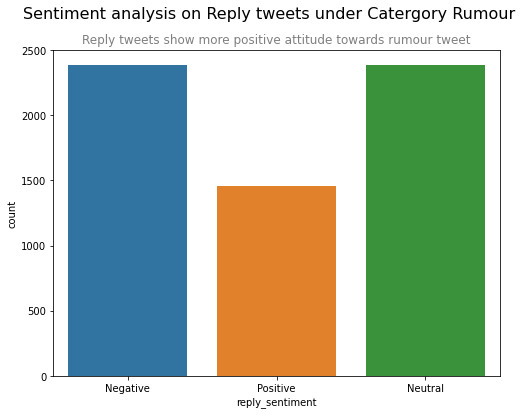

In [14]:
print(df[df.label ==1]['reply_sentiment'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='reply_sentiment',data= df[df['label'] == 1])

plt.suptitle('Sentiment analysis on Reply tweets under Catergory Rumour',fontsize=16)
plt.title('Reply tweets show more positive attitude towards rumour tweet',fontsize=12,color='grey')
plt.savefig('graph/ferguson/senti_reply_rumour.pdf',dpi=300)

In [ ]:
print(df[df.label ==0]['reply_sentiment'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='reply_sentiment',data= df[df['label'] == 0])

plt.suptitle('Sentiment analysis on Reply tweets under Catergory Non-Rumour',fontsize=16)
plt.title('Reply tweets show more neutrual attitude towards non-rumour tweet',fontsize=12,color='grey')
plt.savefig('graph/ferguson/senti_reply_nonrumour.pdf',dpi=300)

In [ ]:
print(src_tw_df['src_sentiment'].value_counts())
sns.countplot(x='src_sentiment',data =src_tw_df,hue='label')

plt.suptitle('Sentiment analysis on Source Tweets',fontsize=16)
plt.title('Rumour source tweets show more neutral attitude.',fontsize=12,color='grey')
plt.savefig('graph/ferguson/senti_source.pdf',dpi=300)

### save data to csv 

In [ ]:
df.to_csv(r'D:\論文\PHEME9\Data\CSV\ferguson-df.csv',index=False)
src_tw_df.to_csv(r'D:\論文\PHEME9\Data\CSV\ferguson-src.csv',index=False)

## Keywords Extraction
### WordCloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
plt.figure(figsize=(20,10))
mywordcloud = WordCloud().generate(docx)
plt.imshow(mywordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#### Reply Tweets

In [ ]:
#nltk.download('punkt')
from nltk.tokenize import word_tokenize

In [ ]:
reply_sen = df.cleaned_reply_tw.apply(word_tokenize)
reply_tw_list = []
for sen in reply_sen:
    for token in sen:
        reply_tw_list.append(token)
reply_tw_doc = " ".join(reply_tw_list)

In [ ]:
plt.figure(figsize=(20,10))
mywordcloud = WordCloud().generate(reply_tw_doc)
plt.imshow(mywordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
mywordcloud.to_file('graph/ferguson/wordcloud_reply.pdf')

In [ ]:
# positive 
posi_reply_sen = df[df.reply_sentiment=='Positive'].cleaned_reply_tw.apply(word_tokenize)
posi_reply_tw_list = []
for sen in posi_reply_sen:
    for token in sen:
        posi_reply_tw_list.append(token)
posi_reply_tw_doc = " ".join(posi_reply_tw_list)


In [ ]:
plt.figure(figsize=(20,10))
mywordcloud = WordCloud().generate(posi_reply_tw_doc)
plt.imshow(mywordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
mywordcloud.to_file('graph/ferguson/wordcloud_reply_posi.pdf')

#### Source Tweet

In [ ]:
src_sen = src_tw_df.cleaned_src_tw.apply(word_tokenize)
src_tw_list = []
for sen in src_sen:
    for token in sen:
        src_tw_list.append(token)

src_tw_doc = " ".join(src_tw_list)

In [ ]:
plt.figure(figsize=(20,10))
mywordcloud = WordCloud().generate(src_tw_doc)
plt.imshow(mywordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
mywordcloud.to_file('graph/ferguson/wordcloud_src.pdf')

### Common

In [ ]:
from collections import Counter

In [ ]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [ ]:
pd.DataFrame(get_tokens(reply_tw_list).items(),columns=['word','freq']).plot(kind='bar',x='word',y='freq')
plt.title("Most frequent words among reply tweets are 'Prince','show','tonight'.")

In [ ]:
pd.DataFrame(get_tokens(src_tw_list).items(),columns=['word','freq']).plot(kind='bar',x='word',y='freq')
plt.title("Most frequent words among source tweets are 'Price', 'show', 'tonight'")


## Emotion Detection

### text2emotion package
https://snyk.io/advisor/python/text2emotion 

In [15]:
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
emotion = df.cleaned_reply_tw.apply(te.get_emotion)

In [17]:
emo = emotion.apply(lambda x: max(x,key=x.get))
df['reply_emotion']=emo

In [18]:
df.to_csv(r'D:\論文\PHEME9\Data\CSV\ferguson-df.csv',index=False)

In [19]:
emotion1 = src_tw_df.cleaned_src_tw.apply(te.get_emotion)
emo1 = emotion.apply(lambda x: max(x,key=x.get))
src_tw_df['src_emotion']=emo1

In [20]:
src_tw_df.to_csv(r'D:\論文\PHEME9\Data\CSV\ferguson-src.csv',index=False)